# <hr>
# <center> Anomalies detection </center>
# <hr>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', 100)

In [3]:
Assure = pd.read_csv('../Cleaned_Data/assure.csv', sep = ';')
BonusMalus = pd.read_csv('../Cleaned_Data/classBonusMalus.csv', sep = ';')
Epave = pd.read_csv('../Cleaned_Data/epave.csv', sep = ";")
#Marque = pd.read_excel('../Cleaned_Data/marque.xlsx', sep = ';')
Police = pd.read_csv('../Cleaned_Data/Police.csv', sep = ';')
Sinistre = pd.read_csv('../Cleaned_Data/Sinistre.csv', sep = ';')
#Usage = pd.read_excel('../Cleaned_Data/Usage.xlsx', sep = ';')
UsageCGA = pd.read_csv('../Cleaned_Data/UsageCGA.csv', sep = ';')
Vehicule = pd.read_csv('../Cleaned_Data/vehicule.csv', sep = ';')

c:\users\skanix\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\skanix\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# <hr>
# <center>1 Number of cars that a customer owns with a contract type 'I'</center>
# <hr>

In [68]:
df=BonusMalus.groupby('assure_id')[['vehicule_id']].count().sort_values(by='vehicule_id',ascending=False).reset_index()
df=df.dropna()

In [69]:
df.head()

,assure_id,vehicule_id
0,53968,415
1,140093,232
2,36330,223
3,144593,207
4,63302,160


In [70]:
nbe_voiture = input("Donnez le nbe max de voiture ")

In [71]:
# Make a list of assure_id that have more than 50 vehicles
liste=df.where(df['vehicule_id'] > int(nbe_voiture)).dropna(how='all')['assure_id'].values

In [72]:
len(liste)

9

In [73]:
# We extract the ploice_id from the assure_id which are in our list to check the type of contract (I, F) and Etat_Police (V, S, R) in the police table
df2 = BonusMalus.where(BonusMalus['assure_id'].isin(liste)).dropna(how='all')

In [74]:
df2.shape

(1739, 26)

In [75]:
# We have a df (BonusMalus + Police) which contains the assure_id which has more than 100 cars with their police_id
df2 = pd.merge(left=df2, right=Police, left_on='police_id', right_on='id')

In [76]:
df2.shape

(1739, 43)

In [77]:
# We remove the assure_id which has a contract not in progress
df2 = df2.where(df2['Etat_Police'] == 'V').dropna(how='all')

# We only let policyholders who have a contract of type = 'I': individual
df2=df2.where(df2['typePolice']=='I').dropna(how='all')

In [78]:
df2.shape

(984, 43)

In [79]:
# typePolice check 
df2['typePolice'].unique()

array(['I'], dtype=object)

In [80]:
# Etat_Police check
df2['Etat_Police'].unique() 

array(['V'], dtype=object)

### <b> We check the use of cars and remove the assure_id that do not have a business (according to the car's usage code): because the one who has a usage code relating to a business explains that he owns several cars </b>

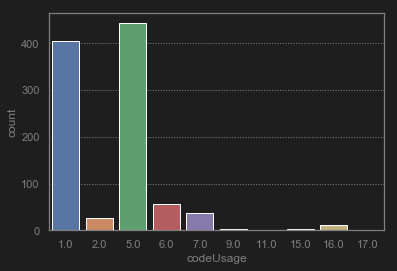

In [81]:
sns.countplot(df2['codeUsage'])

### Vehicle use:
- 1 Private and professional
- 2 Agricultural 1 vehicle with GVW <3500 kg
- 3 Agricultural 2 vehicle with GVW> 3500 kg
- 4 Agricultural Tractor and Combine Harvester => `` Company to be deleted ''
- 5 Utility 1 vehicle with gross vehicle weight <3500 kg (including road use) => `Company to be deleted`
- 6 Utility 2 vehicle with gross vehicle weight> 3500 kg (including roads) => `` Company to be deleted ''
- 7 Public transport of goods (with dangerous and flammable material) => `` Company to be deleted ''
- 8 Public passenger transport => `delete`
- 9 Private passenger transport (staff / children / association member) => `` Company to be deleted ''
- 10 Taxi => `Company to delete`
- 11 Auto-Ecole => `` Company to be deleted ''
- 12 Renting => `Company to be deleted`
- 13 Rural Transport
- 14 Travel Agencies and Hotels => `Company to be deleted`
- 15 Location => `Company to delete`
- 16 Construction Equipment => `` Company to be deleted ''
- 17 other uses (Ambulance / Hearse / RC Garagiste / RC Trajet etc) => `` Company to be deleted ''

In [82]:
# Finally we leave that use type cars 1.0 - 2.0 -3.0 - 13.0
df2=df2.where(df2['codeUsage'].isin([1.0,2.0,3.0,13.0])).dropna(how='all')

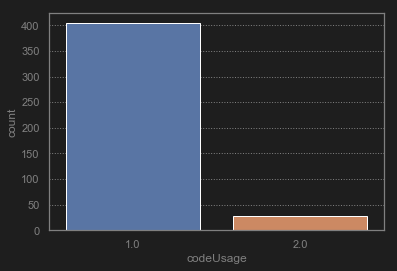

In [83]:
sns.countplot(df2['codeUsage'])

In [84]:
df2.shape

(431, 43)

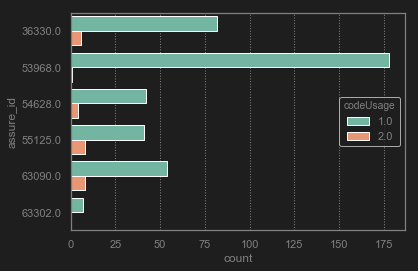

In [85]:
sns.countplot(y="assure_id", hue="codeUsage", data=df2, palette="Set2")

### `There are assur_id which have more than 100 vehicles and type_usage 1 or 2 so to check`

# 2 Insureds who have a current contract and a policy suspended or terminated at the same time

In [86]:
# We make a join between the Police table and BonusMalus to access the Etat_Police and CONTRAT_EN_COURS variables
df3=pd.merge(left=BonusMalus, right=Police, left_on='police_id', right_on='id')


In [87]:
df3_1 = df3.where((df3['Etat_Police']=='V') & (df3['CONTRAT_EN_COURS']==0)).dropna(how='all')
df3_2 = df3.where((df3['Etat_Police']=='S') & (df3['CONTRAT_EN_COURS']==1)).dropna(how='all')
df3_3 = df3.where((df3['Etat_Police']=='R') & (df3['CONTRAT_EN_COURS']==1)).dropna(how='all')

In [88]:
# We merge the three arrays together, each contains a type of problem
df3=pd.concat([df3_1, df3_2,df3_3])

In [89]:
df3.shape

(39350, 43)

In [90]:
# Check
df3.head()[['Etat_Police','CONTRAT_EN_COURS']]

,Etat_Police,CONTRAT_EN_COURS
504,V,0.0
506,V,0.0
516,V,0.0
641,V,0.0
660,V,0.0


## `We can see the existence of 39350 cases`


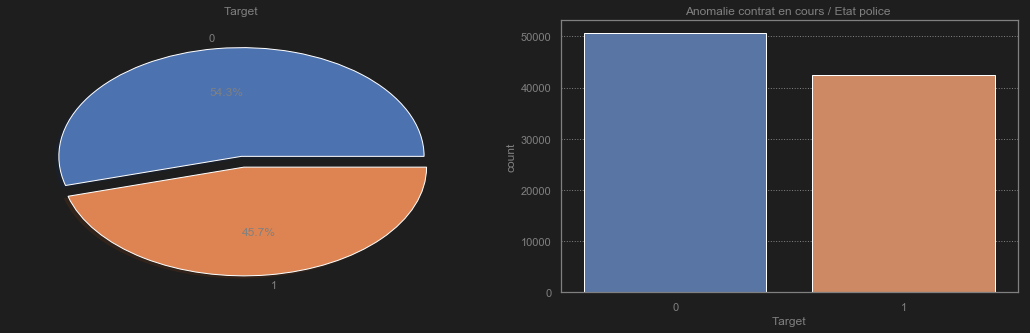

In [91]:
# Display anomaly percentage in graph
liste2=df3['assure_id'].values
BonusMalus["Target"]=0
BonusMalus.Target[BonusMalus['assure_id'].isin(liste2)]=1


f,ax=plt.subplots(1,2,figsize=(18,5))
BonusMalus["Target"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot("Target",data=BonusMalus,ax=ax[1])
ax[1].set_title('Anomalie contrat en cours / Etat police ')
plt.show()

# 3 Cars that have multiple classBonusMalus with current Police_State

# `Conclusion`

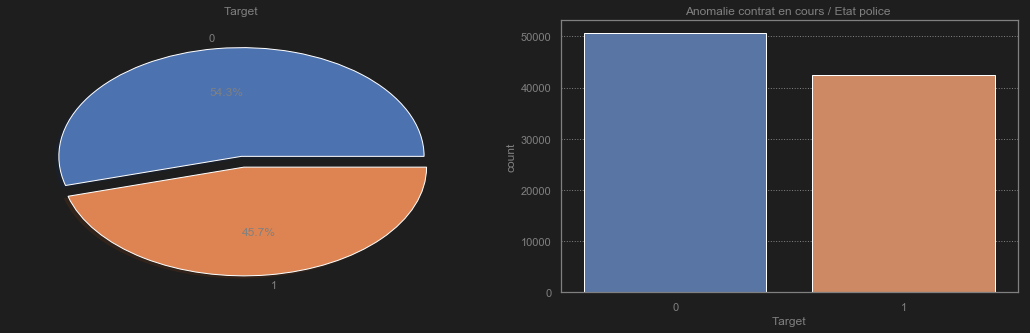

In [92]:
# Case1: insured owns several type I cars
liste2=df2['assure_id'].values
# Case2: current contracts and Etat_Police
liste3=df3['assure_id'].values

BonusMalus["Target"]=0
BonusMalus.Target[BonusMalus['assure_id'].isin(liste2)]=1
BonusMalus.Target[BonusMalus['assure_id'].isin(liste3)]=1

f,ax=plt.subplots(1,2,figsize=(18,5))
BonusMalus["Target"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot("Target",data=BonusMalus,ax=ax[1])
ax[1].set_title('Anomalie contrat en cours / Etat police ')
plt.show()

## => We notice that 45.7% of our database contains one anomaly every month

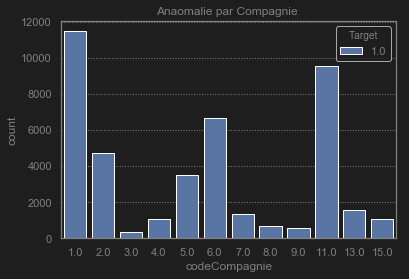

In [107]:
dff = pd.merge(left=BonusMalus, right=Police, left_on='police_id', right_on='id')
dff=dff.where(dff['Target']==1).dropna(how='all')

plt.title('Anaomalie par Compagnie ')
ax2 = sns.countplot(x= 'codeCompagnie', hue = 'Target', data = dff)
plt.show()